# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
df_data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(df_data.shape)
print(df_data.isna().sum())
print(df_data.duplicated().sum())
print(df_data.dtypes)

(5391, 6)
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
0
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


In [5]:
df_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1635,3063,6/29/2001,crazy/beautiful,"$13,000,000","$19,929,123","$16,929,123"
354,3350,3/25/1983,The Outsiders,"$10,000,000","$25,697,647","$25,697,647"
747,928,10/28/1994,Stargate,"$55,000,000","$196,565,669","$71,565,669"
2640,2786,3/31/2006,Slither,"$15,250,000","$12,930,343","$7,802,450"
1945,3684,12/20/2002,Narc,"$7,500,000","$11,843,260","$10,465,659"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
# df1['Avg_Annual'] = df1['Avg_Annual'].str.replace(',', '')
# df1['Avg_Annual'] = df1['Avg_Annual'].str.replace('$', '')
# df1['Avg_Annual'] = df1['Avg_Annual'].astype(int)

df_data['USD_Production_Budget'] = df_data['USD_Production_Budget'].str.replace('$','')
df_data['USD_Production_Budget'] = df_data['USD_Production_Budget'].str.replace(',','')
df_data['USD_Production_Budget'] = pd.to_numeric(df_data['USD_Production_Budget'])
df_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"


In [7]:
df_data['USD_Worldwide_Gross'] = df_data['USD_Worldwide_Gross'].str.replace('$','')
df_data['USD_Worldwide_Gross'] = df_data['USD_Worldwide_Gross'].str.replace(',','')
df_data['USD_Worldwide_Gross']

,USD_Worldwide_Gross
0,11000000
1,0
2,8000000
3,3000000
4,22000000
...,...
5386,0
5387,0
5388,0
5389,0


In [8]:
df_data['USD_Domestic_Gross'] = df_data['USD_Domestic_Gross'].str.replace('$','')
df_data['USD_Domestic_Gross'] = df_data['USD_Domestic_Gross'].str.replace(',','')

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [9]:
df_data['USD_Worldwide_Gross'] = pd.to_numeric(df_data['USD_Worldwide_Gross'])
df_data['Release_Date'] = pd.to_datetime(df_data['Release_Date'])


In [10]:
df_data['USD_Domestic_Gross'] = pd.to_numeric(df_data['USD_Domestic_Gross'])
print(df_data.dtypes)

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object


In [11]:
df_data.USD_Domestic_Gross = pd.to_numeric(df_data.USD_Domestic_Gross)
df_data.dtypes

,0
Rank,int64
Release_Date,datetime64[ns]
Movie_Title,object
USD_Production_Budget,int64
USD_Worldwide_Gross,int64
USD_Domestic_Gross,int64


In [12]:
df_data.sample()
print(df_data.info())
print(df_data.memory_usage())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB
None
Index                      132
Rank                     43128
Release_Date             43128
Movie_Title              43128
USD_Production_Budget    43128
USD_Worldwide_Gross      43128
USD_Domestic_Gross       43128
dtype: int64


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [13]:
df_data.USD_Production_Budget.mean()

31113737.57837136

In [14]:
df_data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [15]:
df_data.head()
df_data.USD_Production_Budget.describe()

,USD_Production_Budget
count,"5,391.00"
mean,"31,113,737.58"
std,"40,523,796.88"
min,"1,100.00"
25%,"5,000,000.00"
50%,"17,000,000.00"
75%,"40,000,000.00"
max,"425,000,000.00"


In [16]:
print(df_data.USD_Worldwide_Gross.describe())
df_data[df_data['USD_Worldwide_Gross'] == 2783918982]

count           5,391.00
mean       88,855,421.96
std       168,457,757.00
min                 0.00
25%         3,865,206.00
50%        27,450,453.00
75%        96,454,455.00
max     2,783,918,982.00
Name: USD_Worldwide_Gross, dtype: float64


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [17]:
df_data.sort_values(by=['USD_Domestic_Gross','USD_Worldwide_Gross','USD_Production_Budget']).head(25)
df_data.USD_Domestic_Gross.min()
df_data.USD_Worldwide_Gross.min()

0

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
df_data[df_data['USD_Domestic_Gross'] == 0].sort_values(by='USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [19]:
df_data[df_data['USD_Worldwide_Gross'] == 0].sort_values(by='USD_Production_Budget',ascending=True).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
4046,5368,2011-11-25,The Ridges,17300,0,0
2156,5365,2003-12-31,Flywheel,20000,0,0
4364,5366,2013-04-01,All Superheroes Must Die,20000,0,0
4885,5367,2015-04-21,The Front Man,20000,0,0
4786,5364,2014-12-31,Dry Spell,22000,0,0


In [20]:
df_data['revenue'] = df_data.USD_Domestic_Gross + df_data.USD_Worldwide_Gross
df_data.sort_values(by='revenue',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,3544426607
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,2995324450
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2866287970
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,2323838603
4131,22,2012-04-05,The Avengers,225000000,1519479547,623279547,2142759094
...,...,...,...,...,...,...,...
4778,5106,2014-12-31,The Sound and the Shadow,500000,0,0,0
4779,5119,2014-12-31,Rise Of the Entrepreneur - The Search For A Be...,450000,0,0,0
4780,5138,2014-12-31,Pancakes,400000,0,0,0
4781,5215,2014-12-31,Horse Camp,250000,0,0,0


In [21]:
df_data['margin'] = df_data.revenue - df_data.USD_Production_Budget
df_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue,margin
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,21000000,20890000
1,5140,1916-05-09,Intolerance,385907,0,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000,15800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000,5900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,33000000,32755000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [22]:
df_data.sort_values(by='margin',ascending=False)[70:100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue,margin
4192,371,2012-07-13,Ice Age: Continental Drift,95000000,879765137,161321843,1041086980,946086980
3680,689,2010-06-30,The Twilight Saga: Eclipse,68000000,706102828,300531751,1006634579,938634579
4539,97,2014-01-08,Guardians of the Galaxy,170000000,771100771,333172112,1104272883,934272883
3513,1001,2009-11-20,The Twilight Saga: New Moon,50000000,687557727,296623634,984181361,934181361
1257,1276,1999-06-08,The Sixth Sense,40000000,672806292,293506292,966312584,926312584
3148,68,2008-05-22,Indiana Jones and the Kingdom of the Crystal S...,185000000,786558145,317023851,1103581996,918581996
2204,212,2004-04-06,Harry Potter and the Prisoner of Azkaban,130000000,796688549,249538952,1046227501,916227501
5186,85,2016-05-08,Suicide Squad,175000000,746100054,325100054,1071200108,896200108
2856,133,2007-02-07,Transformers,151000000,708272592,319246193,1027518785,876518785
2029,139,2003-05-15,The Matrix Reloaded,150000000,738576929,281553689,1020130618,870130618


In [23]:
df_data.sort_values(by='Rank', ascending=True)[100:]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,revenue,margin
2306,101,2004-10-11,The Polar Express,170000000,319090241,194949659,514039900,344039900
4073,102,2012-01-06,Snow White and the Huntsman,170000000,401021746,155136755,556158501,386158501
1956,103,2003-01-07,Terminator 3: Rise of the Machines,170000000,433058296,150358296,583416592,413416592
2252,104,2004-07-05,Van Helsing,170000000,300150546,120150546,420301092,250301092
4908,105,2015-05-22,Tomorrowland,170000000,207283457,93436322,300719779,130719779
...,...,...,...,...,...,...,...,...
1209,5387,1999-02-04,Following,6000,240495,48482,288977,282977
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2676,-2324
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,0,-5000
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,0,-1400


### Filtering on Multiple Conditions

In [24]:
df_data.drop(columns=['margin','revenue'],inplace=True)

In [25]:
df_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [26]:
df_data.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [27]:
df_data.loc[(df_data.USD_Worldwide_Gross > 0) & (df_data.USD_Domestic_Gross == 0)].tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [28]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [29]:
future_releases = df_data.query('Release_Date > @scrape_date')

In [30]:
data_clean = df_data.query('Release_Date < @scrape_date')

In [31]:
data_clean = df_data.drop(future_releases.index)

In [32]:
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [33]:
money_losing_films = data_clean.query('(USD_Worldwide_Gross + USD_Domestic_Gross) < USD_Production_Budget')

In [34]:
money_losing_films_ratio = (money_losing_films.shape[0]) / (data_clean.shape[0])
money_losing_films_ratio

0.2810178306092125

# Seaborn for Data Viz: Bubble Charts

In [36]:
import seaborn as sns

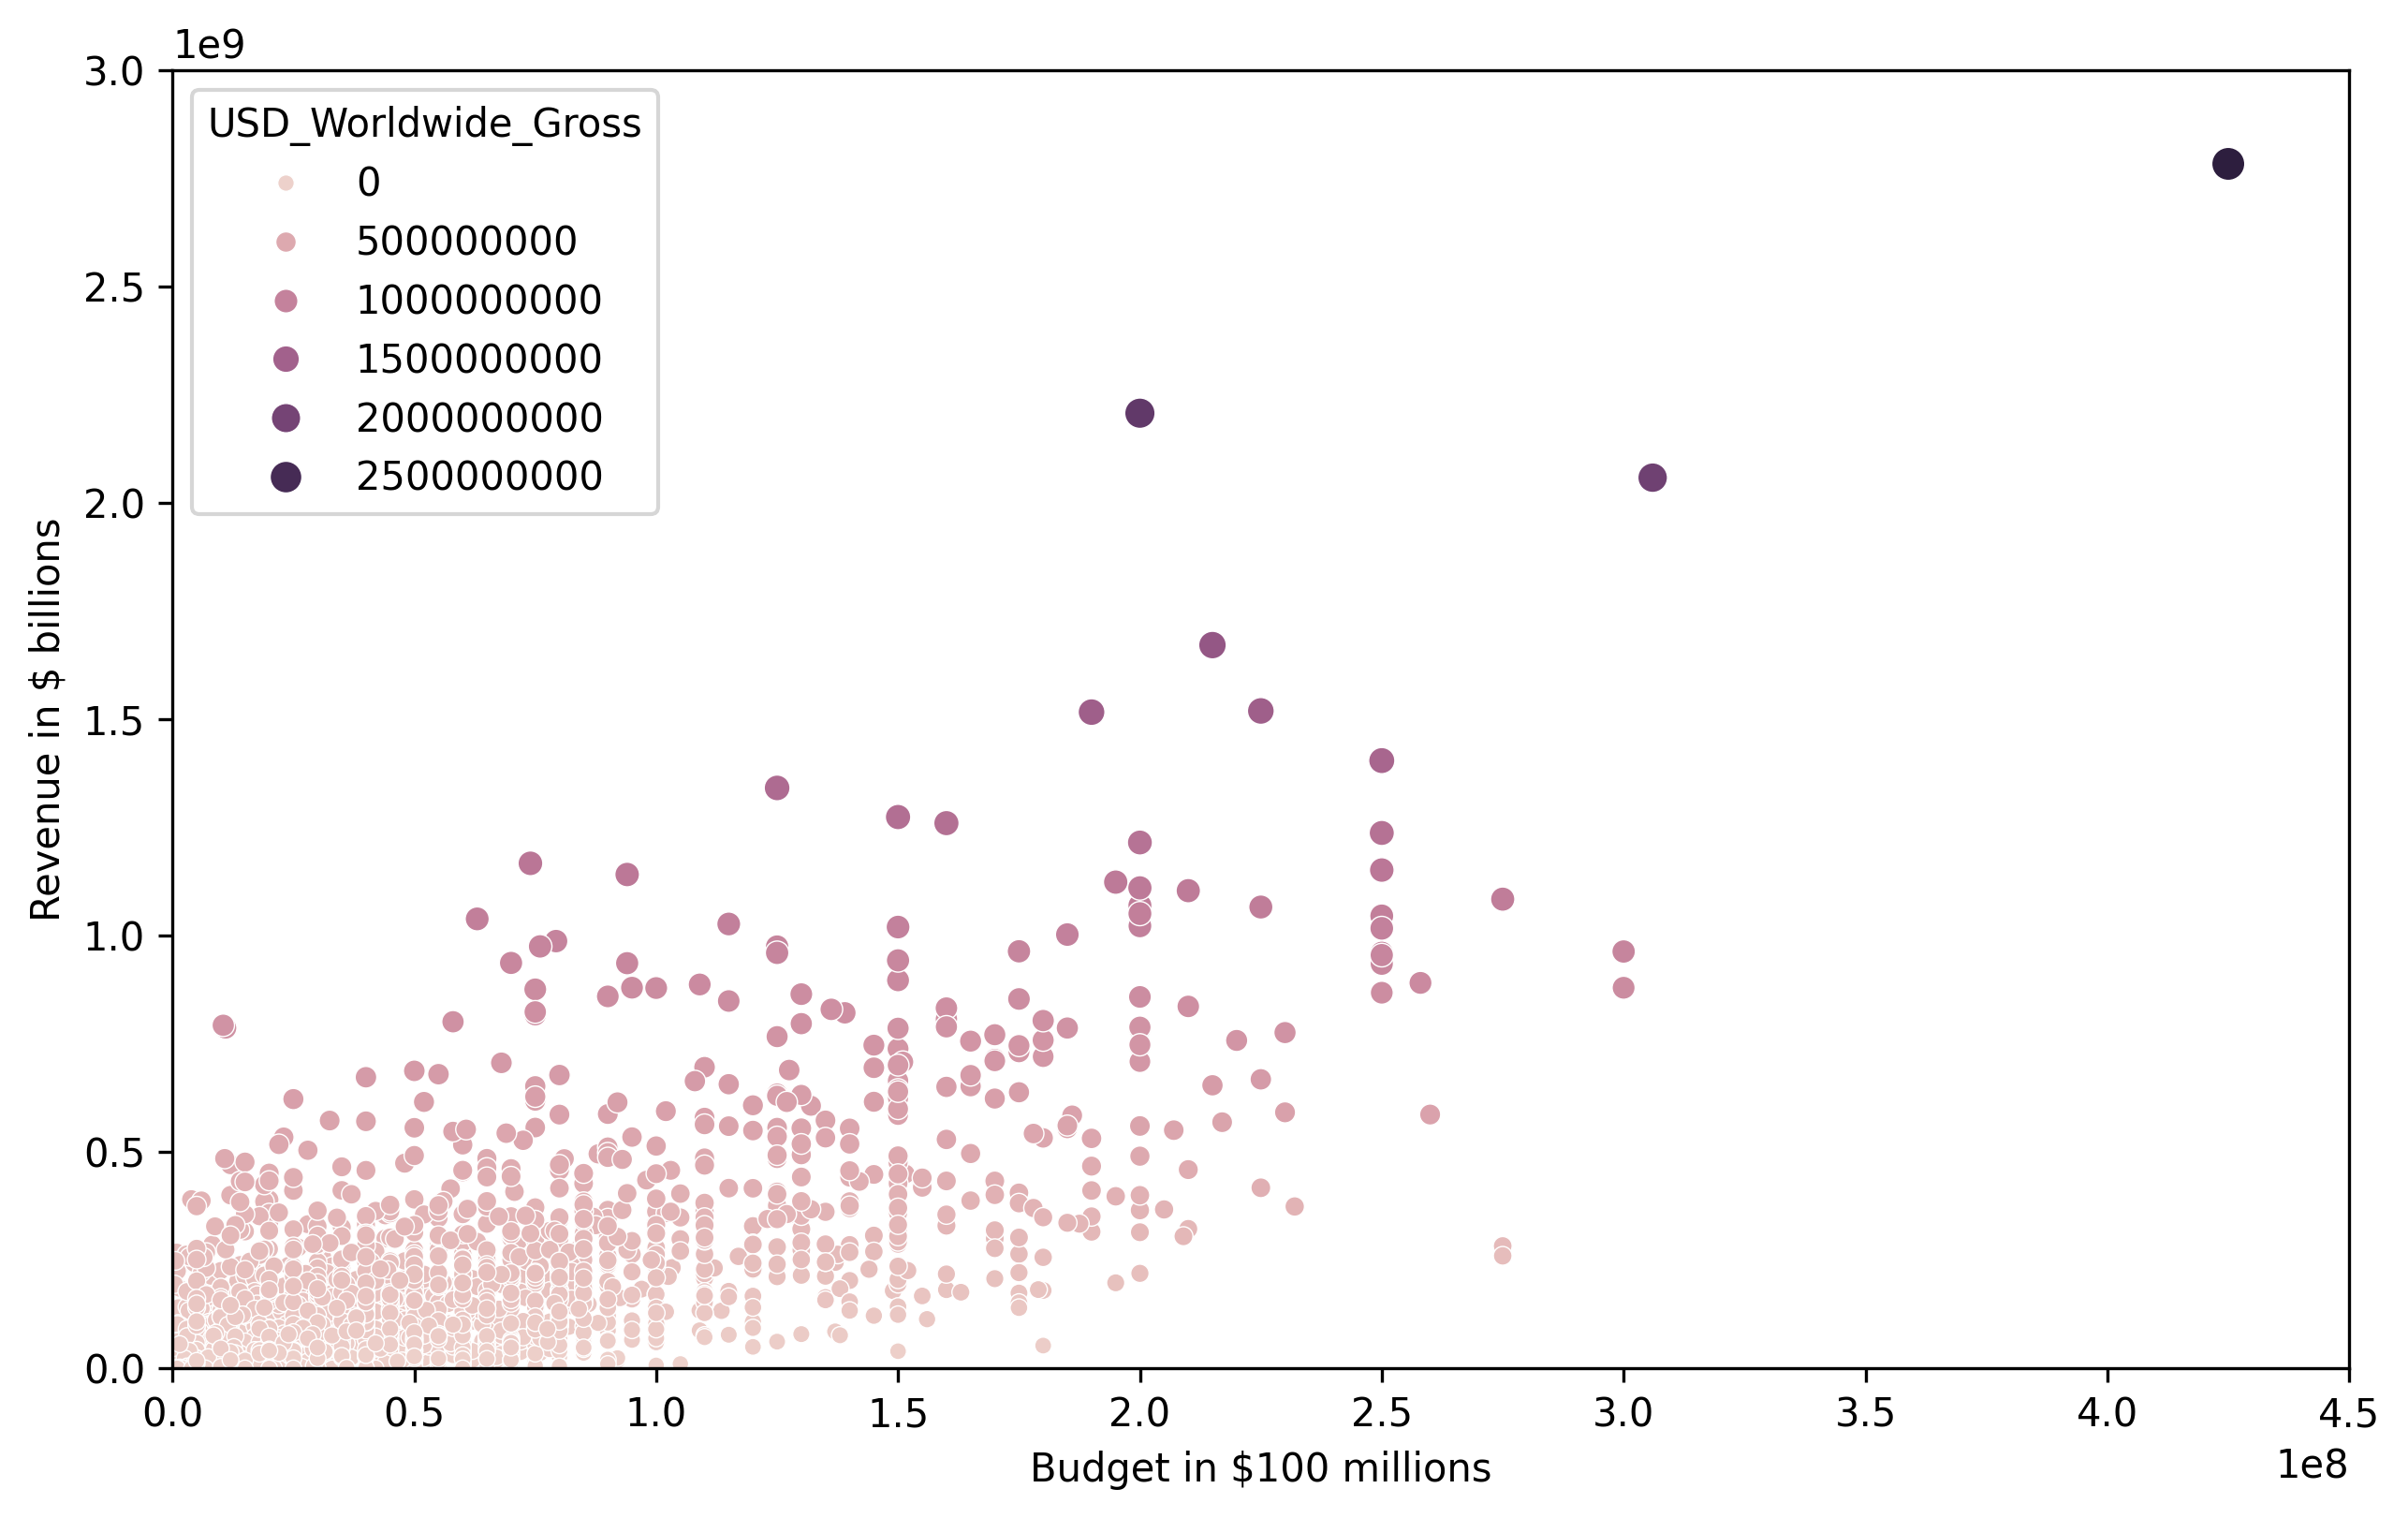

In [57]:
plt.figure(figsize=(10,6),dpi=300)
scatter = sns.scatterplot(x='USD_Production_Budget',y='USD_Worldwide_Gross',data=data_clean,hue='USD_Worldwide_Gross',size='USD_Worldwide_Gross')
scatter.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [51]:
# (data_clean.Release_Date[0].year//10)*10

data_clean['Decade'] = data_clean['Release_Date'].agg(lambda x: (x.year//10)*10)

<ipython-input-51-4638e4ae25d5>:3: FutureWarning: using <function <lambda> at 0x7eb932032ca0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  data_clean['Decade'] = data_clean['Release_Date'].agg(lambda x: (x.year//10)*10)


In [52]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

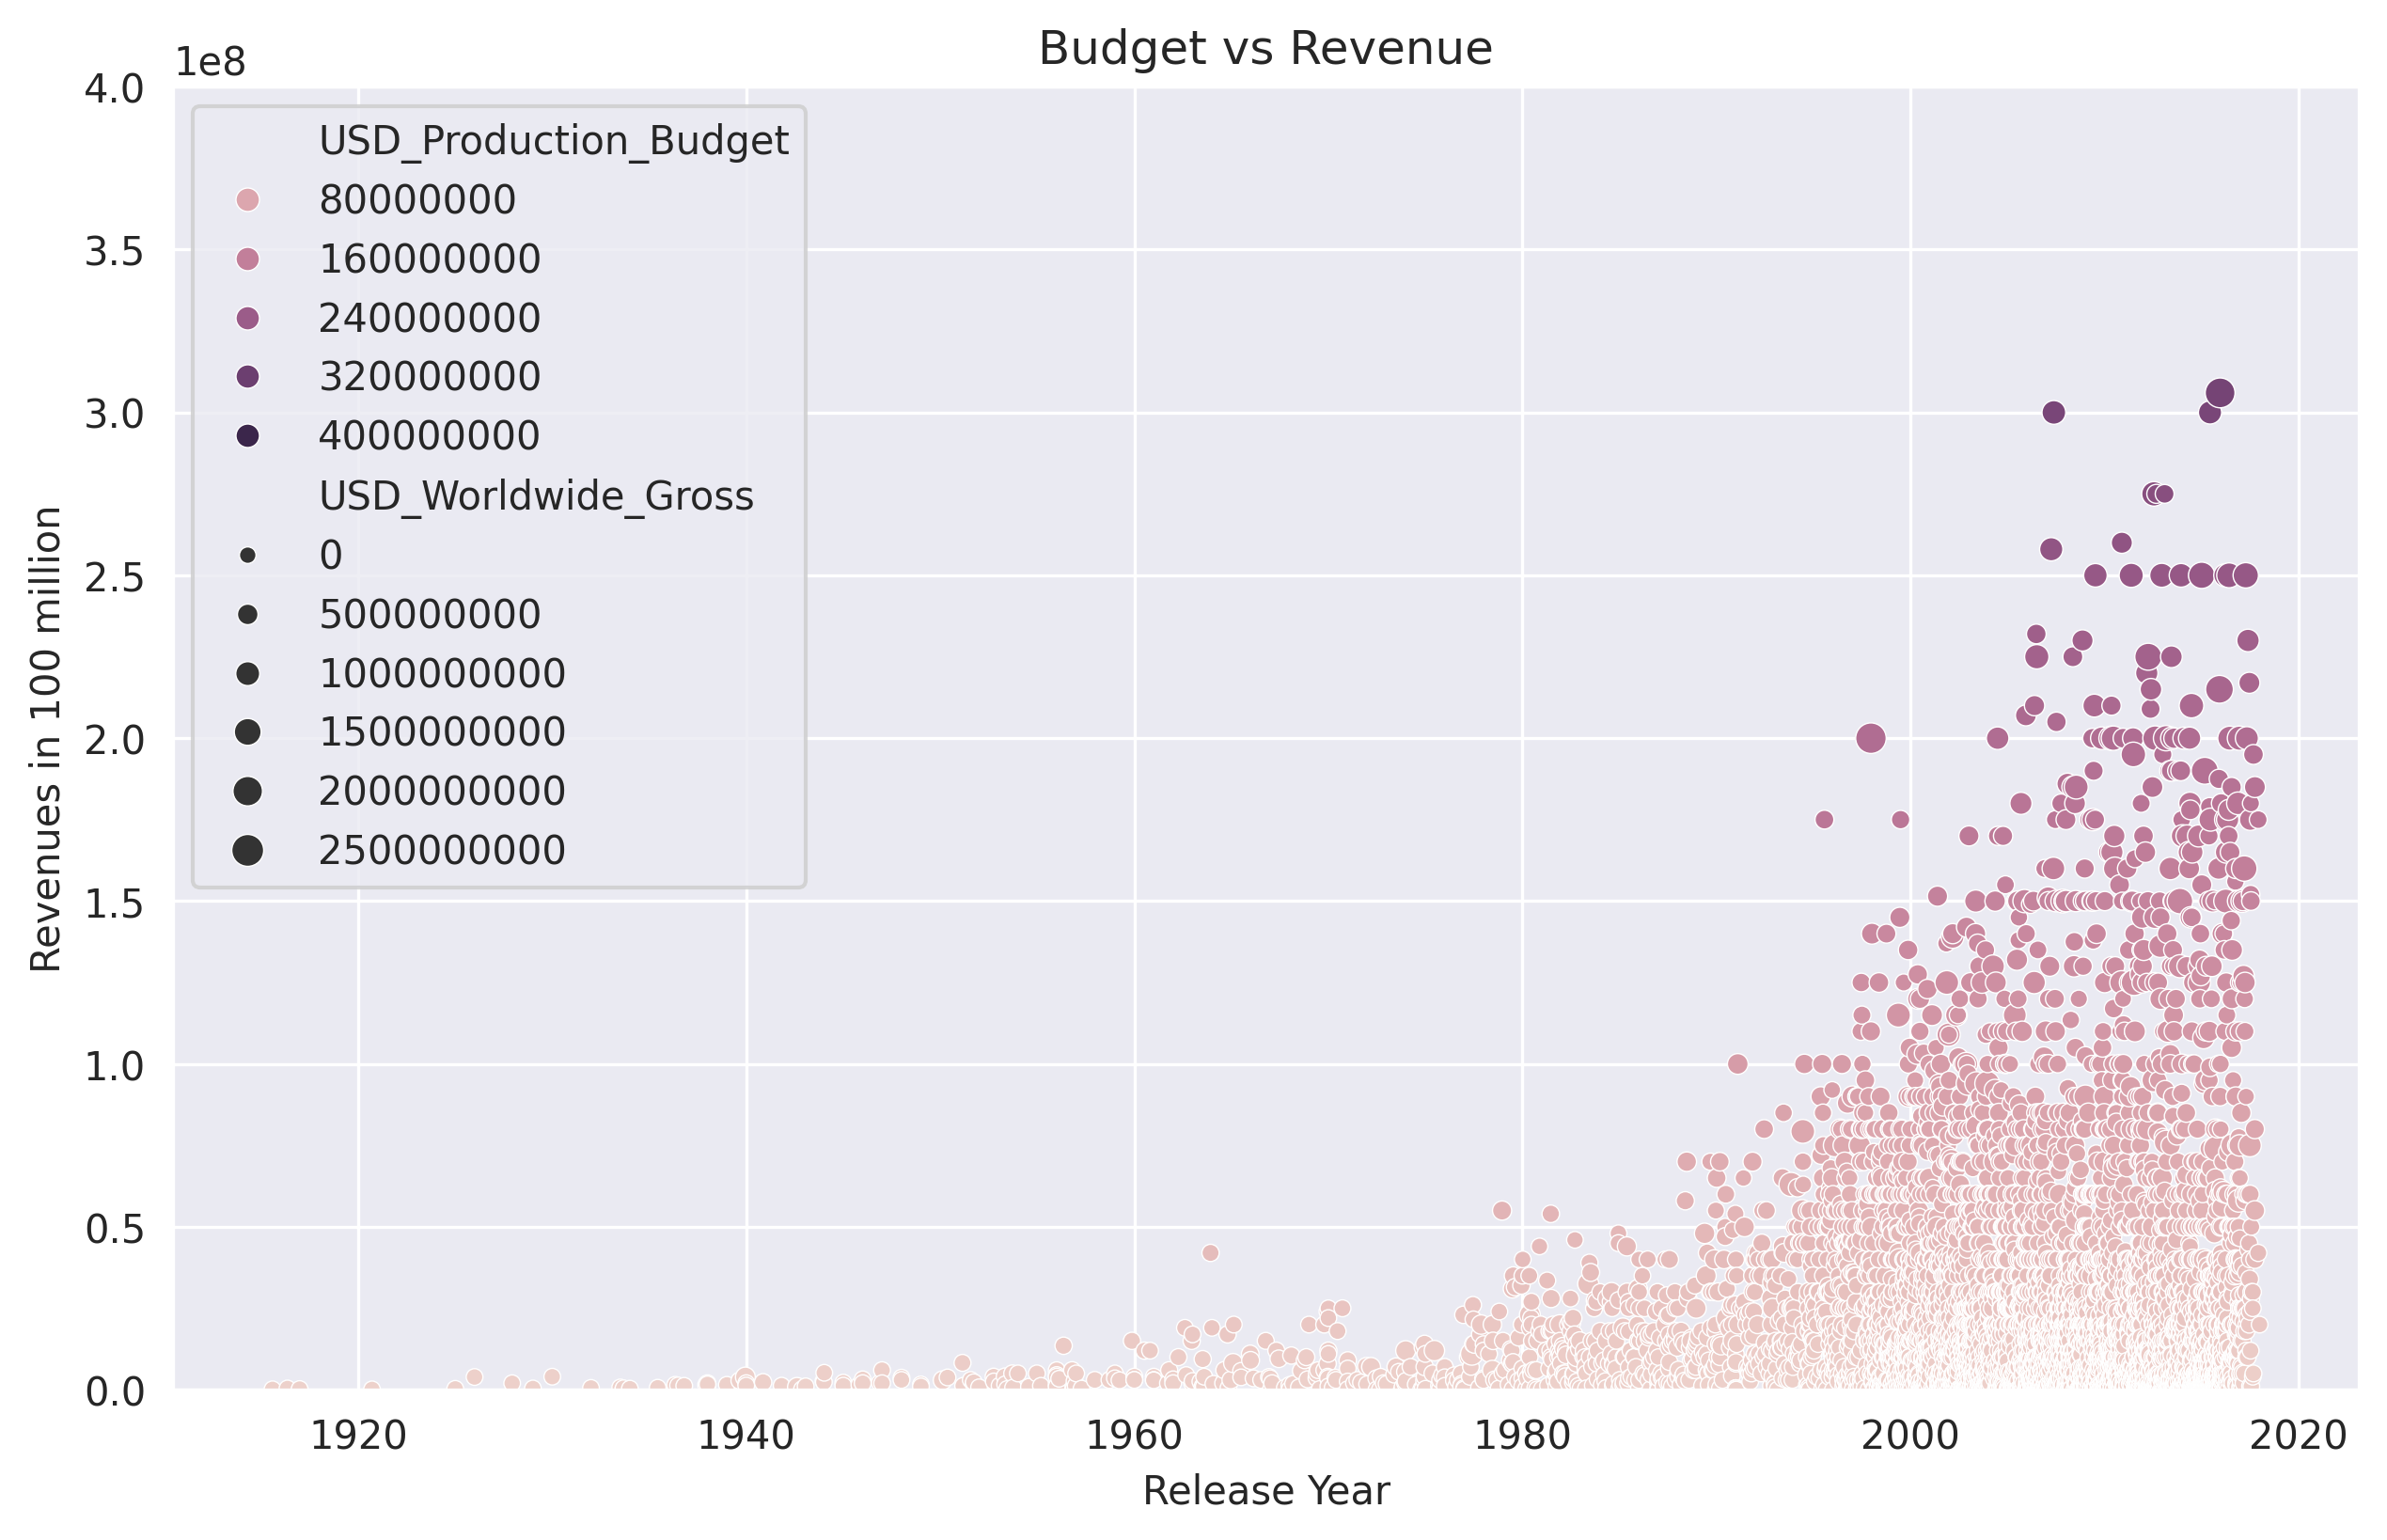

In [68]:
plt.figure(figsize=(10,6),dpi=300)
with sns.axes_style(style={'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}):
  scatter=sns.scatterplot(y='USD_Production_Budget',x='Release_Date',data=data_clean,hue='USD_Production_Budget', size='USD_Worldwide_Gross')
scatter.set(ylabel='Revenues in 100 million', xlabel='Release Year', title='Budget vs Revenue', ylim=(0,400000000))
plt.show()

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [53]:
old_films = data_clean.query('Decade <= 1969')
new_films = data_clean.query('Decade > 1969')

In [54]:
old_films.shape

(153, 7)

In [56]:
old_films.USD_Production_Budget.max()
old_films[old_films['USD_Production_Budget']  == 42000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


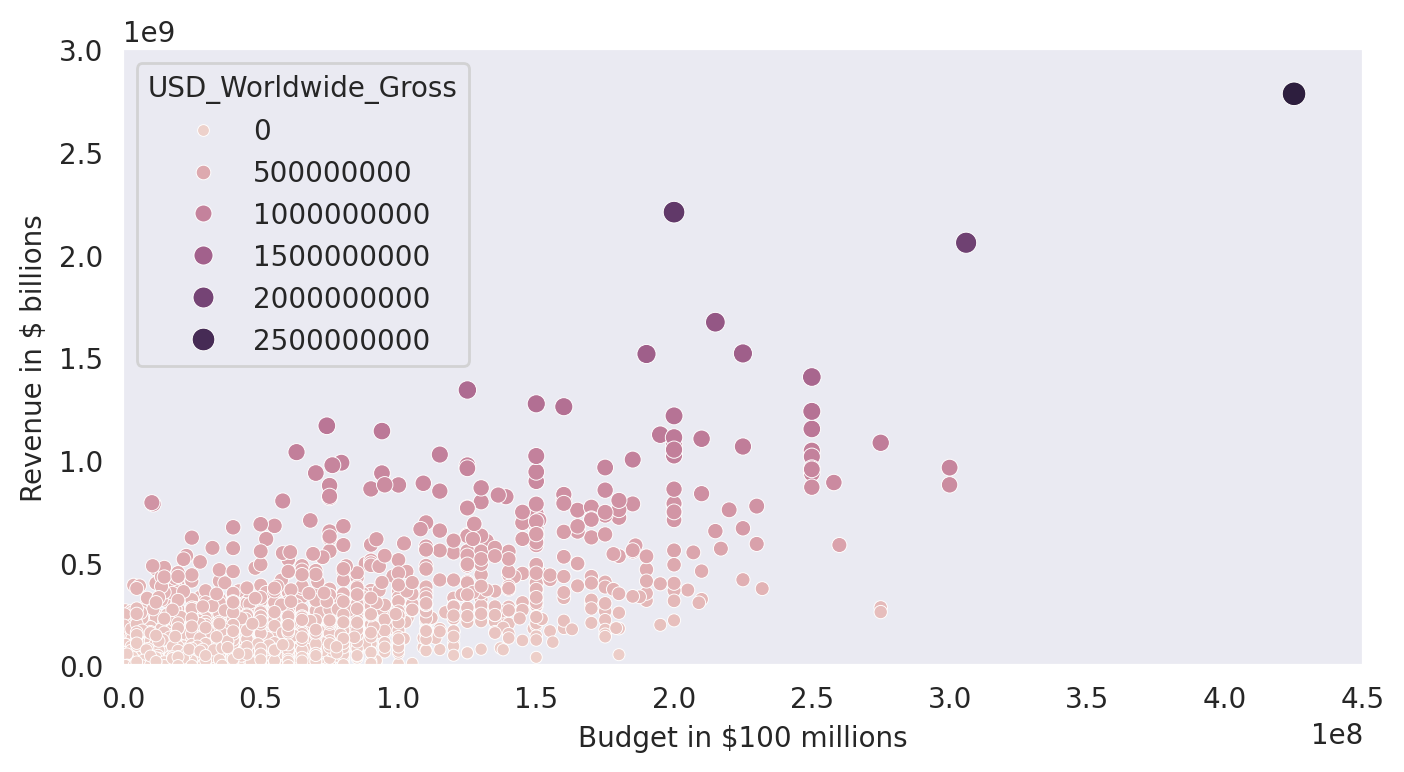

In [73]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('dark'):
  ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

  ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

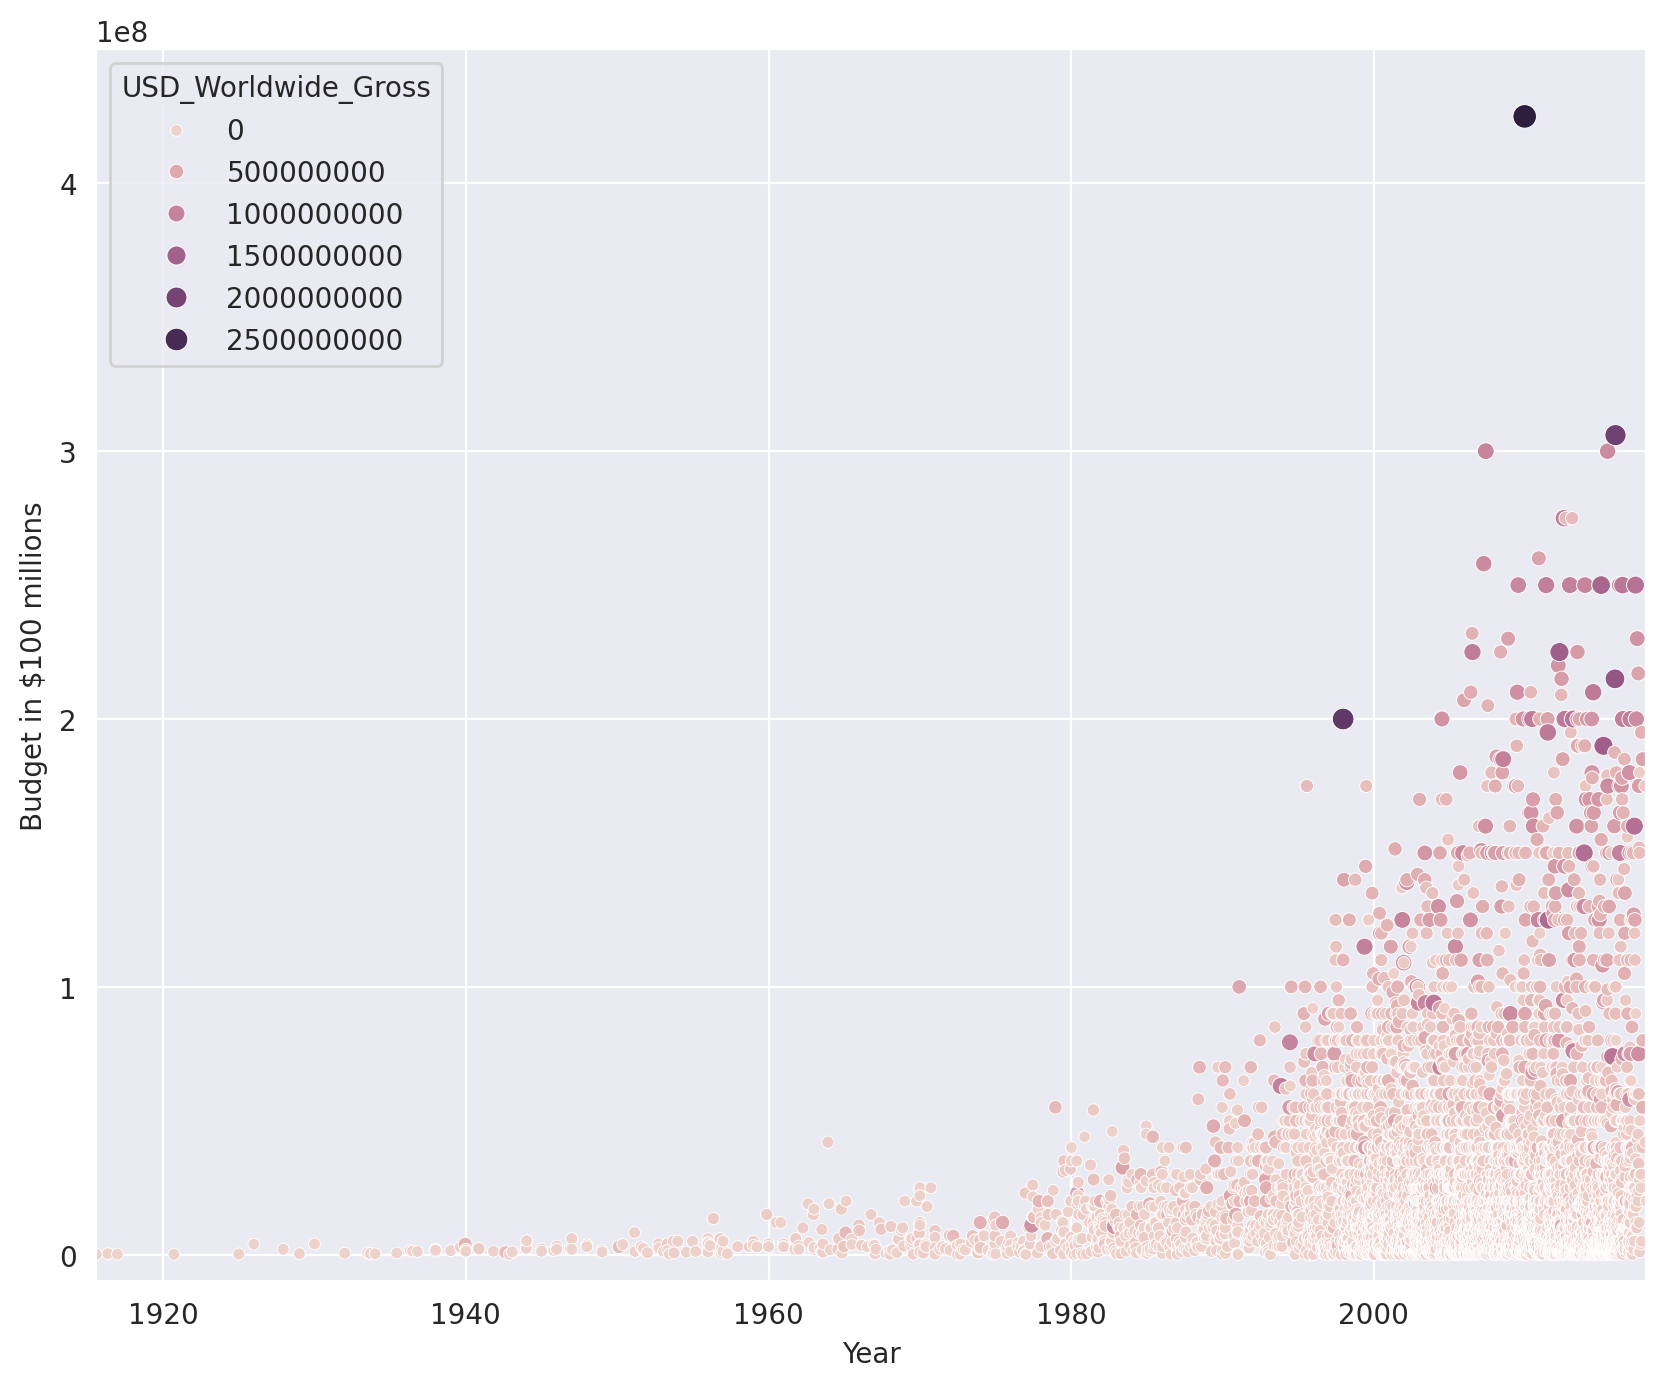

In [82]:
plt.figure(figsize=(10,8), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(-10000000, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

plt.show()

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

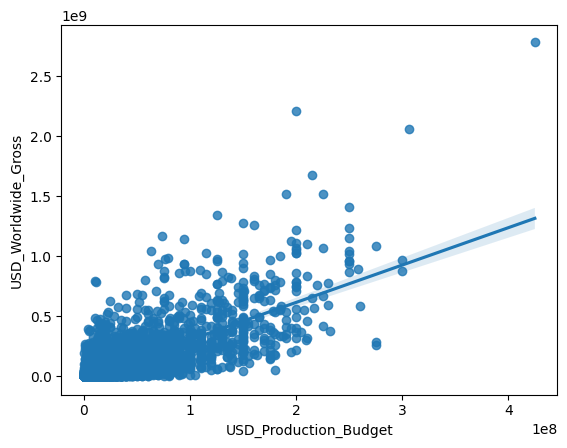

In [83]:
sns.regplot(data=data_clean,x='USD_Production_Budget',y='USD_Worldwide_Gross')

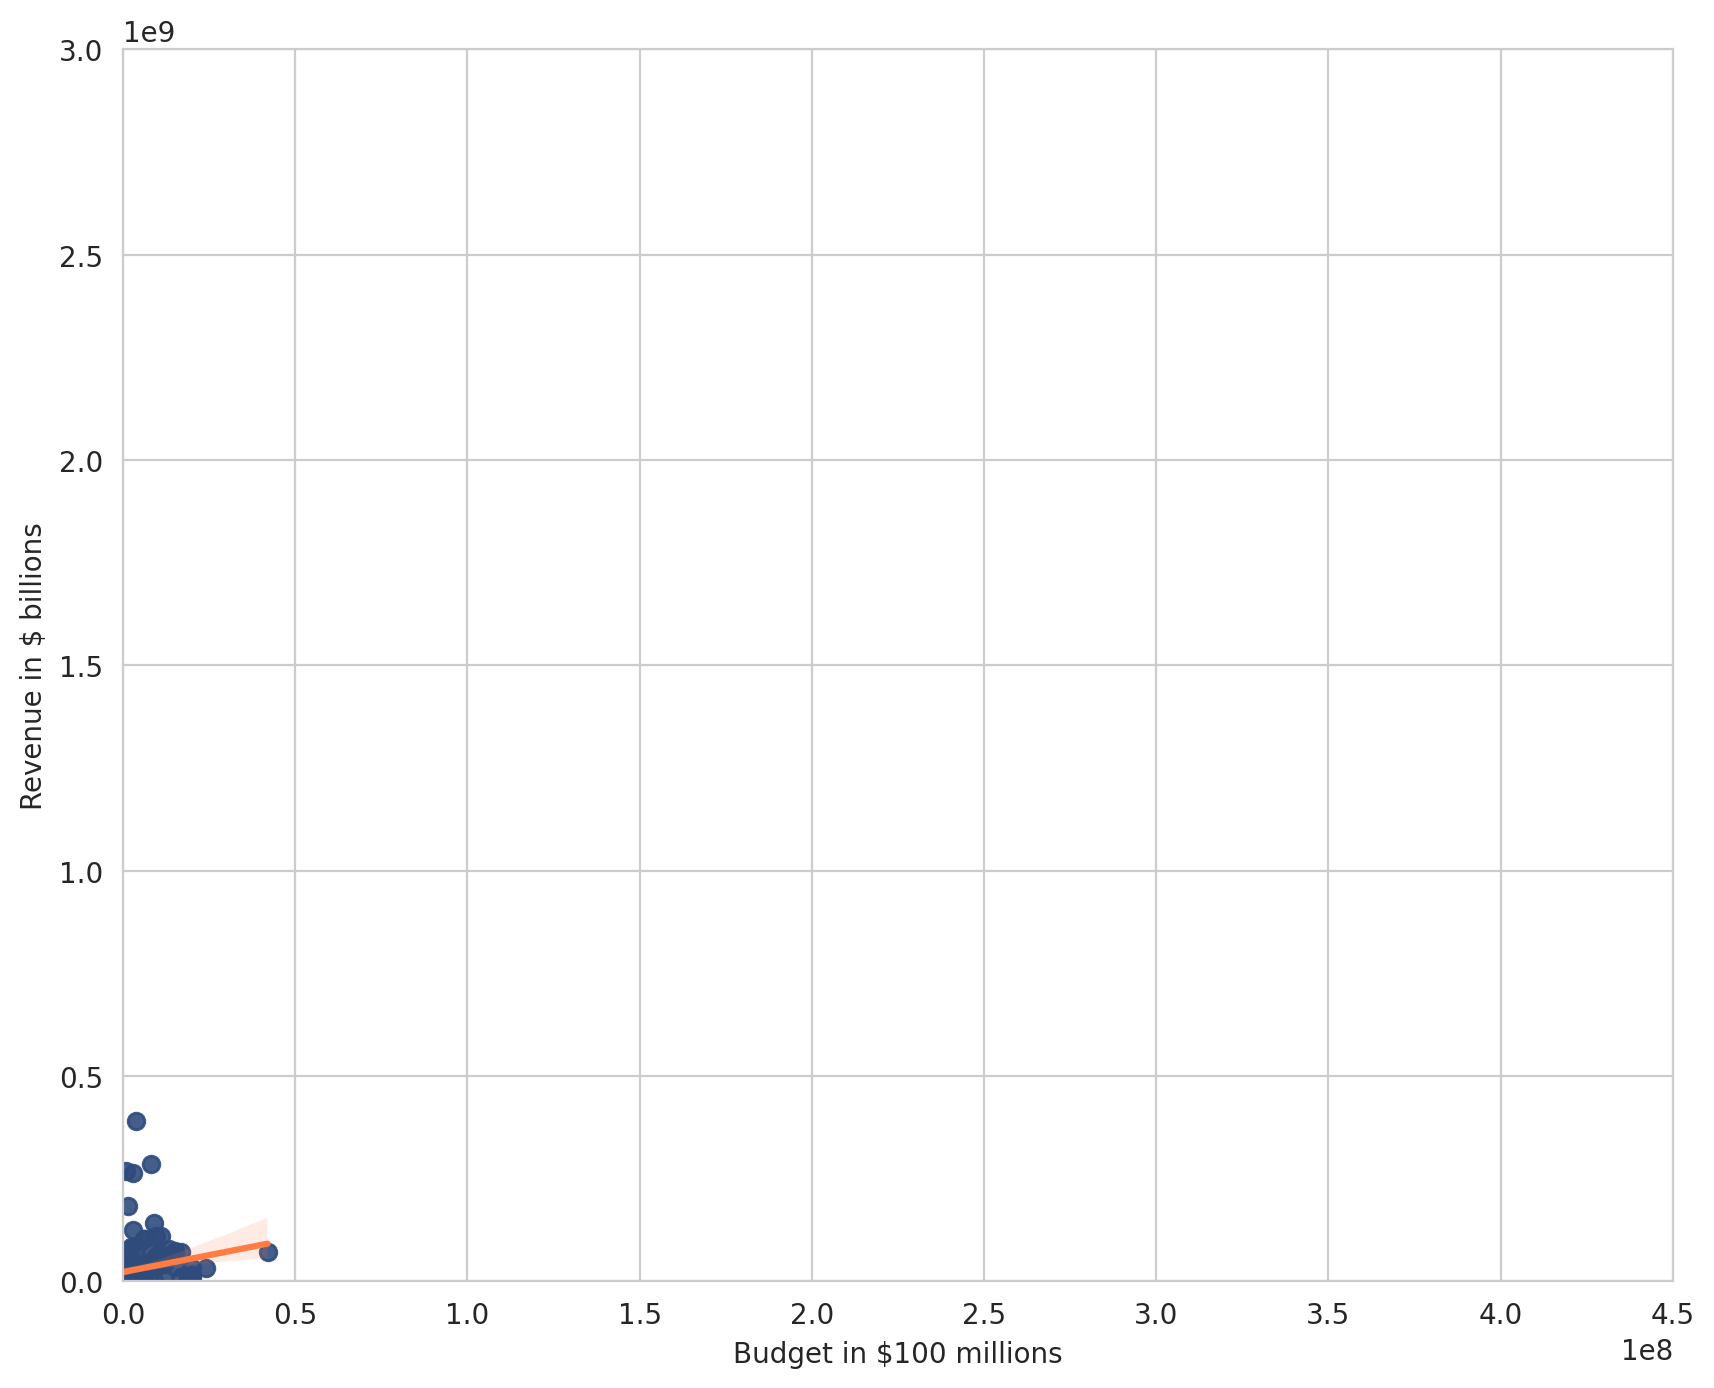

In [115]:
plt.figure(figsize=(10,8), dpi=200)
with sns.axes_style('whitegrid'):
  ax = sns.regplot(data=old_films,x='USD_Production_Budget',y='USD_Worldwide_Gross', scatter_kws={'color': '#2f4b7c', 'alpha':0.9}, line_kws={'color': '#ff7c43'})
  ax.set(xlim=(0, 450000000),
       ylim=(0, 3000000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

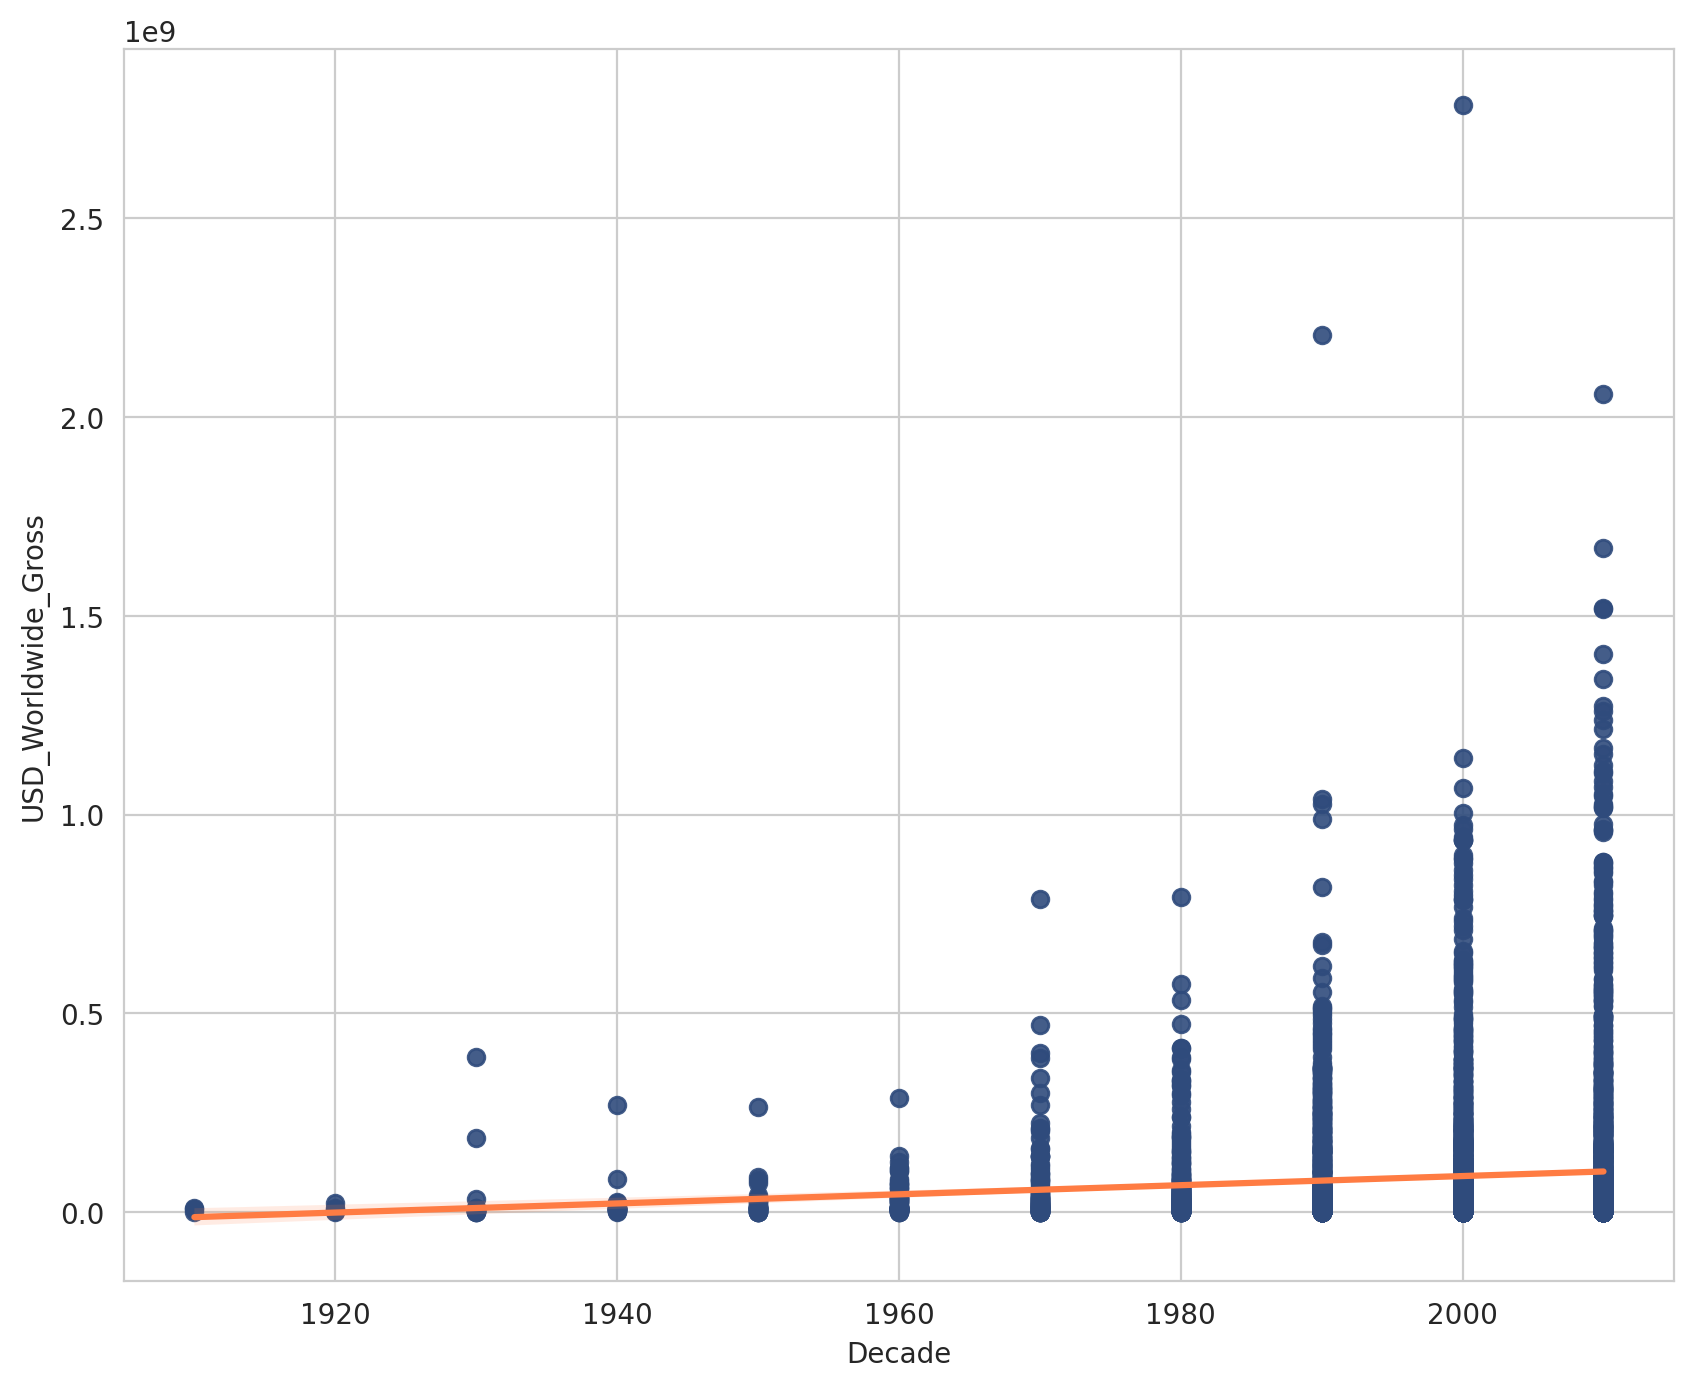

In [92]:
plt.figure(figsize=(10,8), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=data_clean,x='Decade',y='USD_Worldwide_Gross', scatter_kws={'color': '#2f4b7c', 'alpha':0.9}, line_kws={'color': '#ff7c43'})

In [91]:
old_films.loc[old_films.USD_Worldwide_Gross.idxmax()]

,23
Rank,4248
Release_Date,1939-12-15 00:00:00
Movie_Title,Gone with the Wind
USD_Production_Budget,3900000
USD_Worldwide_Gross,390525192
USD_Domestic_Gross,198680470
Decade,1930


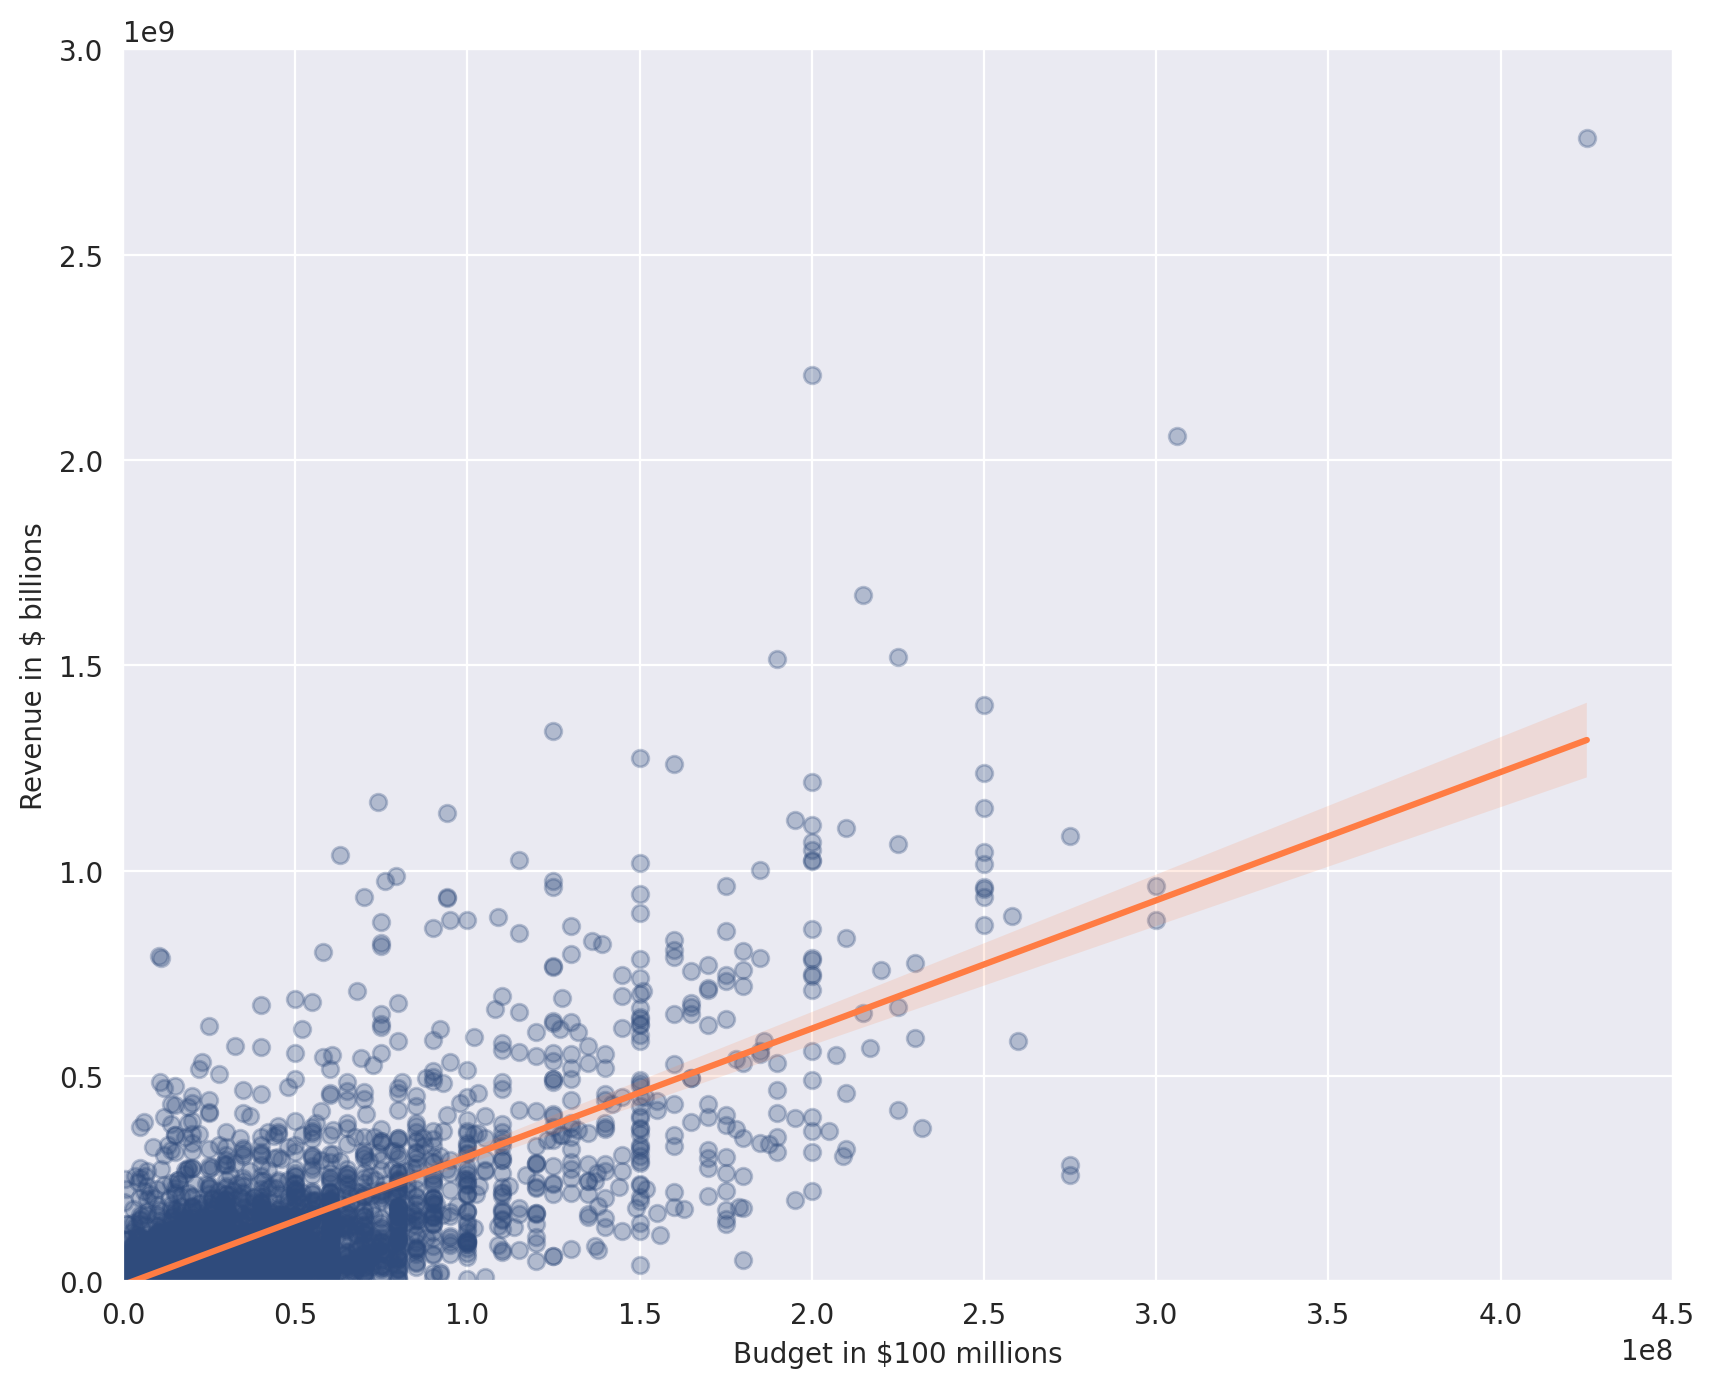

In [100]:
plt.figure(figsize=(10,8), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,x='USD_Production_Budget',y='USD_Worldwide_Gross', scatter_kws={'color': '#2f4b7c', 'alpha':0.3, 'animated': True}, line_kws={'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Explanatory Variable or feature
X = pd.DataFrame(new_films.USD_Production_Budget)
# Target or Response Variable
y = new_films.USD_Worldwide_Gross
# finding the best possible value for thetas
lin_reg.fit(X,y)

LinearRegression()

In [102]:
lin_reg.intercept_

-8650768.006610274

In [103]:
lin_reg.coef_

array([3.12259592])

In [104]:
# Looking are r-squared
lin_reg.score(X,y)

0.5577032617720403

In [105]:
# Running linear regression for old movies

X_old = pd.DataFrame(old_films.USD_Production_Budget)
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [106]:
old_lin_reg = LinearRegression()
old_lin_reg.fit(X_old,y_old)

LinearRegression()

In [107]:
print(old_lin_reg.intercept_)
print(old_lin_reg.coef_)

[22821538.63508039]
[[1.64771314]]


In [108]:
# finding the model fit on the variance
old_lin_reg.score(X_old,y_old)

0.02937258620576877

## Finding values for the below

- How much global revenue does our model estimate for a film with a budget of $350 million?

In [111]:
revenue_estimate = old_lin_reg.intercept_ + old_lin_reg.coef_ * 350000000

In [113]:
revenue_estimate[0][0]

599521139.0388364

In [130]:
budget = 350000000
revenue_estimate = old_lin_reg.intercept_[0] + old_lin_reg.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -8)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
